In [1]:
messages = ["Hey hey hey lets go for dinner today :)",
           "Did you go to school today?",
           "Hey!!! I need a pen"]

In [2]:
# CountVectorizer() takes what’s called the Bag of Words approach. 
#Each message is seperated into tokens and the number of times each token occurs in a message is counted.
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

#Using the fit method, our CountVectorizer() will “learn” what tokens are being used in our messages.
vect.fit(messages)


CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [4]:
# to see what tokens have been “learned” by CountVectorizer
vect.get_feature_names()

[u'did',
 u'dinner',
 u'for',
 u'go',
 u'hey',
 u'lets',
 u'need',
 u'pen',
 u'school',
 u'to',
 u'today',
 u'you']

In [5]:
#in the above output , 
#there are no duplicates
#no punctuation 
#words less than 2 letters are not included

In [6]:
doc_term_matrix = vect.transform(messages)
repr(doc_term_matrix)

"<3x12 sparse matrix of type '<type 'numpy.int64'>'\n\twith 15 stored elements in Compressed Sparse Row format>"

In [7]:
print doc_term_matrix #sparse matrix

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	3
  (0, 5)	1
  (0, 10)	1
  (1, 0)	1
  (1, 3)	1
  (1, 8)	1
  (1, 9)	1
  (1, 10)	1
  (1, 11)	1
  (2, 4)	1
  (2, 6)	1
  (2, 7)	1


In [8]:
#document term matrix 
#is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.
#rows correspond to documents in the collection and columns correspond to terms


#n order to save space/computational power a sparse matrix is created. 
#This means that only the location and value of non-zero values is saved. 
#it’s advisable to keep it in sparse form especially when working with a large corpus.

In [9]:
import pandas as pd
pd.DataFrame(doc_term_matrix.toarray(), columns=vect.get_feature_names())

,did,dinner,for,go,hey,lets,need,pen,school,to,today,you
0,0,1,1,1,3,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0,0,1,0,1,1,0,0,0,0


In [10]:
#in the above output, as we can see "hey" is 3 times in the first document

In [12]:
new_message = ['Hey lets go get a book today']
new_doc_term_matrix = vect.transform(new_message)
pd.DataFrame(new_doc_term_matrix.toarray(), columns=vect.get_feature_names())

,did,dinner,for,go,hey,lets,need,pen,school,to,today,you
0,0,0,0,1,1,1,0,0,0,0,1,0


In [13]:
#in the above output, even though the new message contained 6 unique tokens (excluding 'a') there is only 4 entries in our DTM.
#The tokens 'book' is not represented in the matrix. 
#This is because our original messages did not have this token.

In [14]:
#in order to not lose this message , we will append the new message with the original message
messages.append(new_message[0])
messages

['Hey hey hey lets go for dinner today :)',
 'Did you go to school today?',
 'Hey!!! I need a pen',
 'Hey lets go get a book today']

In [15]:
dtm = vect.fit_transform(messages) #fit_transform method is used instead of fit() and transform()
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,book,did,dinner,for,get,go,hey,lets,need,pen,school,to,today,you
0,0,0,1,1,0,1,3,1,0,0,0,0,1,0
1,0,1,0,0,0,1,0,0,0,0,1,1,1,1
2,0,0,0,0,0,0,1,0,1,1,0,0,0,0
3,1,0,0,0,1,1,1,1,0,0,0,0,1,0


In [16]:
#TfidfVectorizer also creates a document term matrix from our messages. 
#However, instead of filling the DTM with token counts it calculates term frequency-inverse document frequency (TF-IDF) value for each word

#The TF-IDF is the product of two weights, the term frequency and the inverse document frequency.

#"Term frequency" is a weight representing how often a word occurs in a document.
#"Inverse document" frequency is another weight representing how common a word is across documents.

#If we have several occurences of the same word in one document we can expect the TF-IDF to *increase*.
#If a word is used in many documents then the TF-IDF will *decrease*.

In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer
def createDTM(messages):
    vect = TfidfVectorizer()
    doc_term_matrix = vect.fit_transform(messages) # create DTM
    
    # create pandas dataframe of DTM
    return pd.DataFrame(doc_term_matrix.toarray(), columns=vect.get_feature_names()) 

In [20]:
createDTM(messages)

,book,did,dinner,for,get,go,hey,lets,need,pen,school,to,today,you
0,0.000000,0.000000,0.375211,0.375211,0.000000,0.239492,0.718477,0.295821,0.000000,0.000000,0.000000,0.000000,0.239492,0.000000
1,0.000000,0.455732,0.000000,0.000000,0.000000,0.290888,0.000000,0.000000,0.000000,0.000000,0.455732,0.455732,0.290888,0.455732
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.411378,0.000000,0.644503,0.644503,0.000000,0.000000,0.000000,0.000000
3,0.510056,0.000000,0.000000,0.000000,0.510056,0.325562,0.325562,0.402134,0.000000,0.000000,0.000000,0.000000,0.325562,0.000000


In [21]:
#in the above output, "go" and "today" have the lowest values since they are the most common words in the 4 documents
# for eg: "book" is a unique term in the message and in the 4th document, so it has highest term frequency.

In [22]:
# Given datset of movie id, sentiment and review

In [31]:
import pandas as pd

train_data = pd.read_csv('C:\Users\payel\Desktop\Data Analysis\labeledTrainData.tsv', sep='\t')

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib , support for numpy and pandas data structures and statistical routines from scipy and statsmodels.
import seaborn as sns; sns.set()
sns.set_style("whitegrid") #to set the background of the below graph as white colored

In [32]:
#IPython has a set of predefined ‘magic functions’  with a command line style syntax. 
#There are two kinds of magic functions, line-oriented and cell-oriented. 
#Line magics are prefixed with the % character and work much like OS command-line calls:where arguments are passed without parentheses or quotes.
#Cell magics are prefixed with a double %%

#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code. 

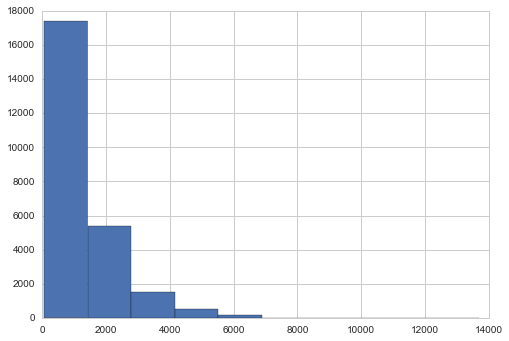

In [35]:
train_data['review_length'] = train_data.review.apply(len)  #"review" is a column name  

p = plt.hist(train_data.review_length.values)

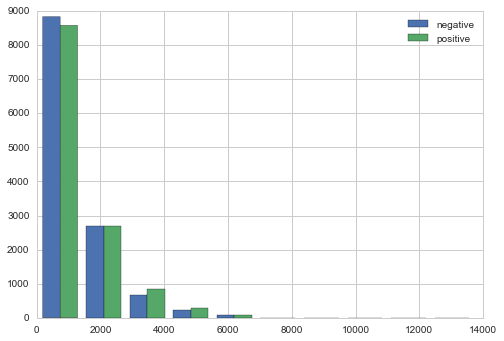

In [40]:
p = plt.hist([train_data[train_data.sentiment == 0].review_length.values, 
              train_data[train_data.sentiment == 1].review_length.values], label=['negative', 'positive']) #only *label* keyword
plt.legend()

#Legends can be placed in various positions: A legend can be placed inside or outside the chart. 
#o place the legend inside, simply call legend().

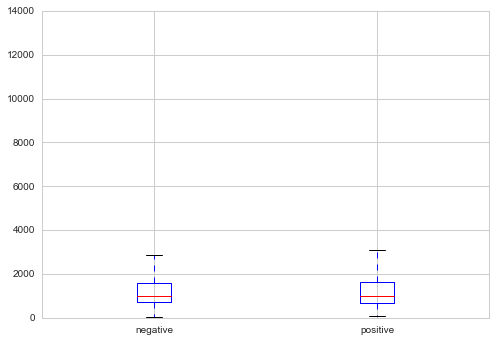

In [38]:
bp = plt.boxplot([train_data[train_data.sentiment==0].review_length.values, 
                  train_data[train_data.sentiment==1].review_length.values], labels=['negative', 'positive']) #only *labels* keyword


In [41]:
# Negative reviews
train_data[train_data.sentiment==0].describe()

,sentiment,review_length
count,12500.0,12500.000000
mean,0.0,1305.942240
std,0.0,959.400711
min,0.0,52.000000
25%,0.0,711.000000
50%,0.0,978.500000
75%,0.0,1570.000000
max,0.0,8999.000000


In [42]:
# Positive reviews
train_data[train_data.sentiment==1].describe()

,sentiment,review_length
count,12500.0,12500.000000
mean,1.0,1349.965440
std,0.0,1049.249815
min,1.0,70.000000
25%,1.0,695.000000
50%,1.0,984.000000
75%,1.0,1654.000000
max,1.0,13708.000000
